In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt

In [2]:
df1=pd.read_csv("Dataset/train.csv",header=None)
df2=pd.read_csv("Dataset/test.csv",header=None)

In [3]:
X_train , y_train = np.array(df1.iloc[:, 1:]), df1[0]
X_test , y_test = np.array(df2.iloc[:, 1:]), df2[0]

In [4]:
X_train=X_train.reshape(len(X_train),28,28)
X_test=X_test.reshape(len(X_test),28,28)

In [5]:
for i in range(0,len(X_train)):
    X_train[i]=X_train[i].transpose()
    
for i in range(0,len(X_test)):
    X_test[i]=X_test[i].transpose()

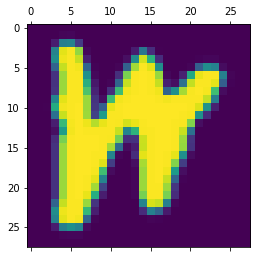

In [6]:
plt.matshow(X_train[0])

In [7]:
X_train=X_train/255
X_test=X_test/255

In [8]:
X_train = X_train.reshape(len(X_train),28,28,1)
X_test = X_test.reshape(len(X_test),28,28,1)

In [9]:
model=keras.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D((2,2)),
    
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D((2,2)),
    
      
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(27,activation='softmax')
])

In [10]:
model.compile(
    optimizer="adam", 
    loss='sparse_categorical_crossentropy',
    metrics=["accuracy"]
)

In [11]:
model.fit(X_train,y_train,epochs=10, shuffle=True)

Epoch 1/10
2775/2775 [==============================] - 35s 12ms/step - loss: 0.5094 - accuracy: 0.8402
Epoch 2/10
2775/2775 [==============================] - 36s 13ms/step - loss: 0.2540 - accuracy: 0.9157
Epoch 3/10
2775/2775 [==============================] - 37s 13ms/step - loss: 0.2063 - accuracy: 0.9297
Epoch 4/10
2775/2775 [==============================] - 42s 15ms/step - loss: 0.1770 - accuracy: 0.9379
Epoch 5/10
2775/2775 [==============================] - 42s 15ms/step - loss: 0.1549 - accuracy: 0.9449
Epoch 6/10
2775/2775 [==============================] - 38s 14ms/step - loss: 0.1375 - accuracy: 0.9506
Epoch 7/10
2775/2775 [==============================] - 37s 13ms/step - loss: 0.1227 - accuracy: 0.9539
Epoch 8/10
2775/2775 [==============================] - 36s 13ms/step - loss: 0.1104 - accuracy: 0.9584
Epoch 9/10
2775/2775 [==============================] - 39s 14ms/step - loss: 0.1006 - accuracy: 0.9604
Epoch 10/10
2775/2775 [==============================] - 37s 13m

In [12]:
model.evaluate(X_test,y_test)

463/463 [==============================] - 2s 4ms/step - loss: 0.2859 - accuracy: 0.9194


[0.285923570394516, 0.9193918704986572]

In [13]:
model.save("model")

INFO:tensorflow:Assets written to: model\assets
